In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn

Reading file from github raw

In [109]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isna().sum().sum()

0

In [8]:
for col in df.columns:
    print("Unique values in "+col+' :')
    print(df[col].unique().shape[0])
    print('\n')

Unique values in age :
47


Unique values in sex :
2


Unique values in bmi :
548


Unique values in children :
6


Unique values in smoker :
2


Unique values in region :
4


Unique values in charges :
1337




In [9]:
for col in df.columns:
    print(col + ' : ' + str(df[col].isna().sum()))

age : 0
sex : 0
bmi : 0
children : 0
smoker : 0
region : 0
charges : 0


In [10]:
for col in df.columns:
    print(col + ' : ' + str(df[col].dtype))

age : int64
sex : object
bmi : float64
children : int64
smoker : object
region : object
charges : float64


In [11]:
for col in df.columns:
    print(df[col].isna().value_counts())

age
False    1338
Name: count, dtype: int64
sex
False    1338
Name: count, dtype: int64
bmi
False    1338
Name: count, dtype: int64
children
False    1338
Name: count, dtype: int64
smoker
False    1338
Name: count, dtype: int64
region
False    1338
Name: count, dtype: int64
charges
False    1338
Name: count, dtype: int64


<Axes: >

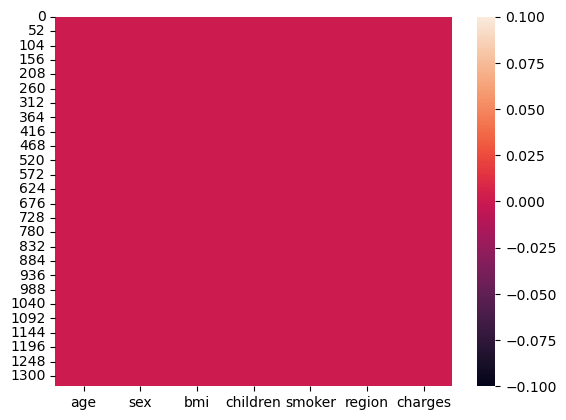

In [12]:
sns.heatmap(df.isna())

All the values are Integer or Float values as they are expected to be. No null values found. Data looks clean No need for preprocessing.Target variable is a categorical variable where quality >= 7, it's good, and quality < 7 it's bad. This is a classification problem. There are no categorical or string columns so no need for seperation


In [13]:
len(df)

1338

# Exploratory Data analysis

Checking columns and data informaiotn

In [23]:
desc_df = pd.DataFrame(df.describe())

In [24]:
desc_df

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


for charges mean is higher than median for others, it's almost same

<Axes: >

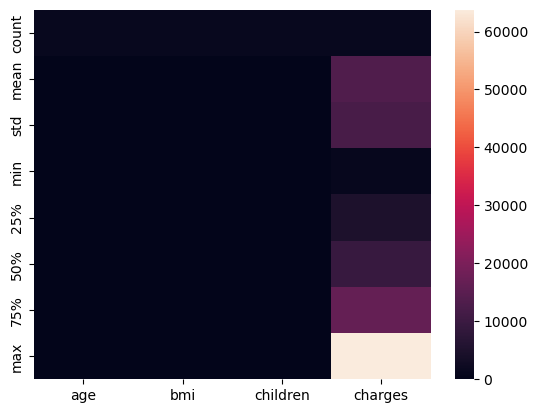

In [17]:
sns.heatmap(desc_df)

In [25]:
mean_gt = []
median_gt = []
mean_eq = []
for col in desc_df.columns:
    if desc_df.loc['mean',col] > desc_df.loc['50%',col]:
        mean_gt.append(col)
    elif desc_df.loc['50%',col] > desc_df.loc['mean',col]:
        median_gt.append(col)
    else:
        mean_eq.append(col)

In [19]:
mean_gt

['age', 'bmi', 'children', 'charges']

In [20]:
median_gt

[]

In [21]:
mean_eq

[]

There are no negative or invalid values
    1. Mean is greater than median for fixed acidity, 

In [26]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: xlabel='age', ylabel='Count'>

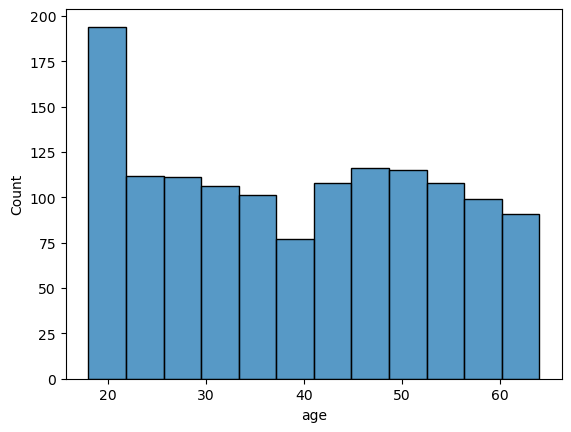

In [29]:
sns.histplot(x=df['age'])

Age is almost evenly distributed

This looks like a normal distribution

<Axes: xlabel='sex', ylabel='Count'>

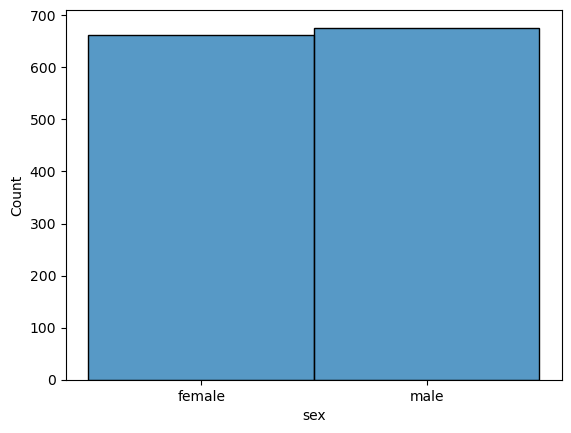

In [28]:
sns.histplot(x=df['sex'])

Sex is also evenly distributed

<Axes: xlabel='citric acid', ylabel='Count'>

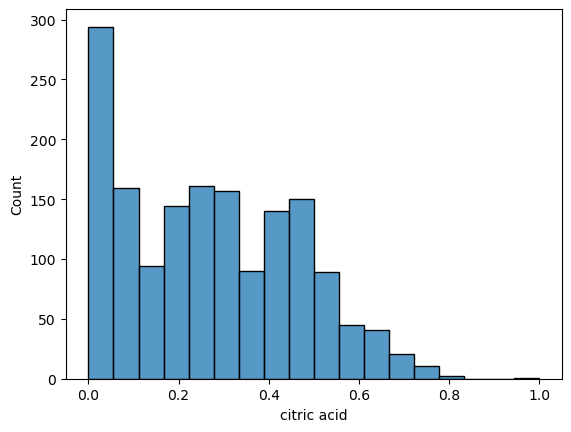

In [30]:
sns.histplot(df['citric acid'])

<Axes: xlabel='bmi', ylabel='Count'>

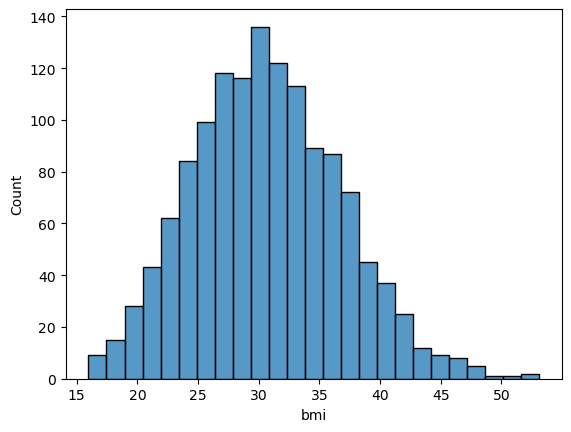

In [32]:
sns.histplot(df['bmi'])

BMI is a normal distribution

<Axes: xlabel='children', ylabel='Count'>

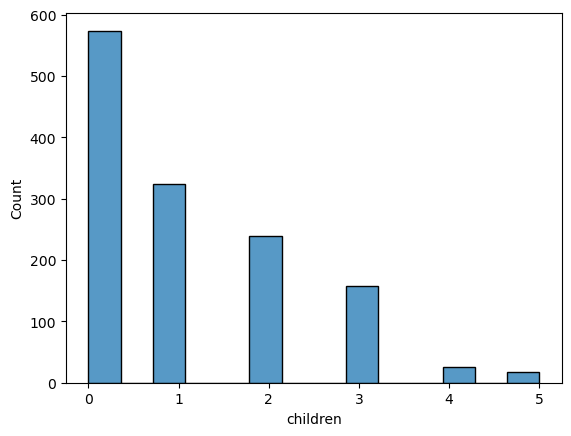

In [33]:
sns.histplot(df['children'])

Most of the people are of age 20's so children are mostly zero. age and children are positively correlated

<Axes: xlabel='smoker', ylabel='Count'>

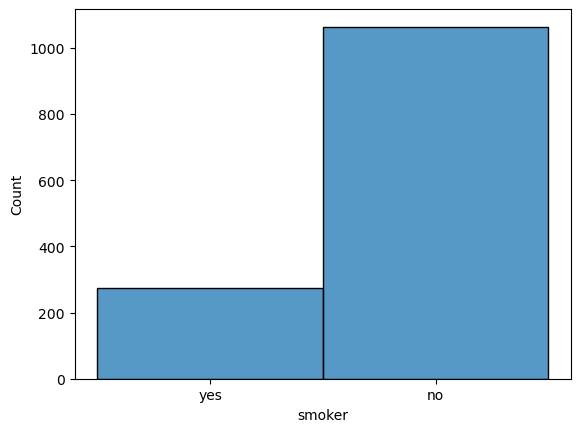

In [35]:
sns.histplot(df['smoker'])

Smokers are more than non smokers

<Axes: xlabel='region', ylabel='Count'>

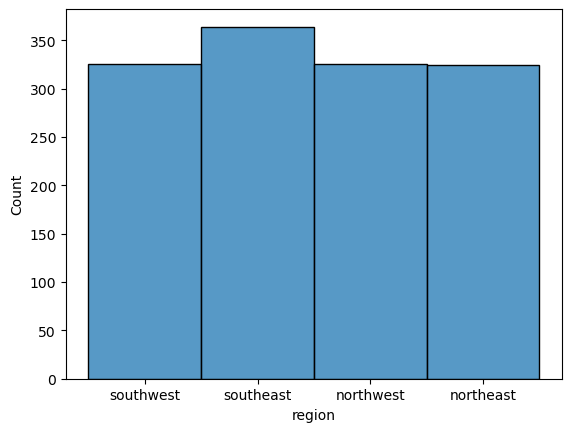

In [36]:
sns.histplot(df['region'])

we have observationsfrom almost same data from all the regions

<Axes: xlabel='charges', ylabel='Count'>

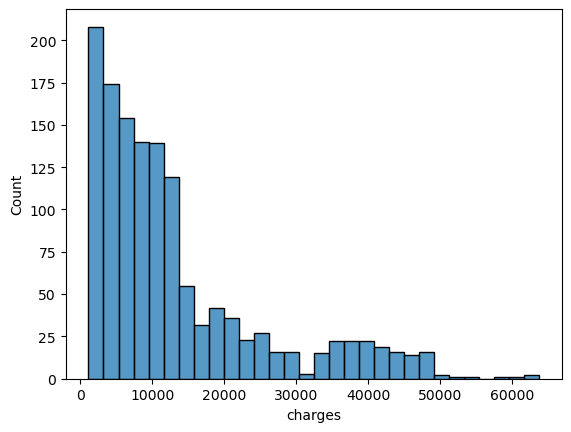

In [38]:
sns.histplot(df['charges'])

Let's convert categorical variables to some numerical values

C:\Users\LEELA DURGA PRASAD\AppData\Local\Temp\ipykernel_16832\793226977.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],color='r')
C:\Users\LEELA DURGA PRASAD\AppData\Local\Temp\ipykernel_16832\793226977.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],color='r')
C:\Users

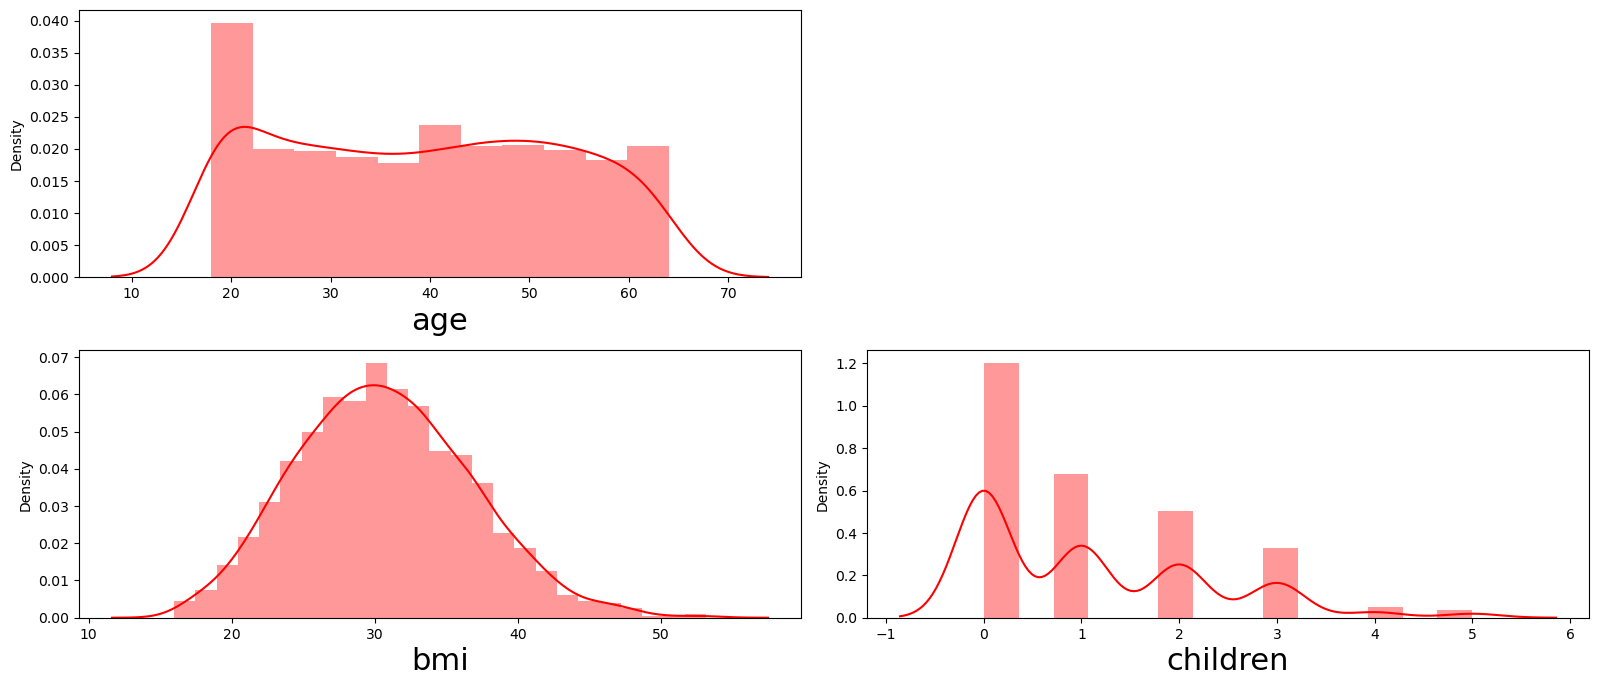

In [41]:
plt.figure(figsize=(16, 20),facecolor='white')
plotnumber = 1
for col in df.columns:
    if plotnumber <= 4 and df[col].dtype != 'object':
        ax = plt.subplot(6,2,plotnumber)
        sns.distplot(df[col],color='r')
        plt.xlabel(col, fontsize=22)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber += 1
plt.tight_layout()

In [67]:
pairs = [(x,y) for x in df.columns for y in df.columns if x != y ]

In [43]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(41.15744444444444, 0.5, 'age')

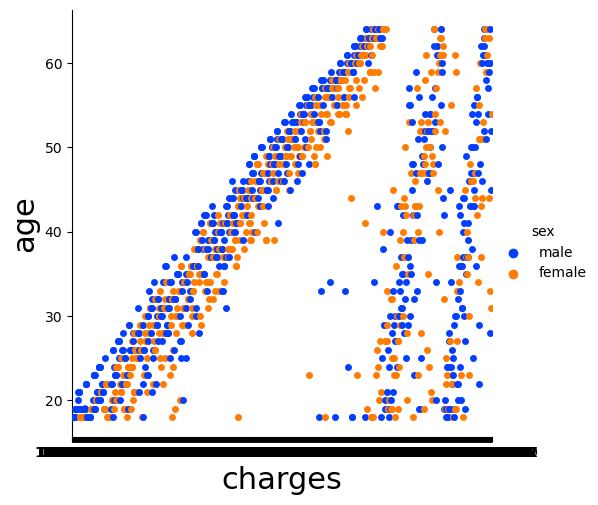

In [45]:
#sns.relplot(data=df, x=col, y='quality', kind="line")
sns.catplot(data=df,x='charges',y='age',hue='sex',palette='bright')
plt.xlabel('charges', fontsize=22)
plt.ylabel('age',fontsize=22)
#         plt.yticks(rotation=0,fontsize=10)
# plt.tight_layout()

Pair plot is used to analyse multivariate analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


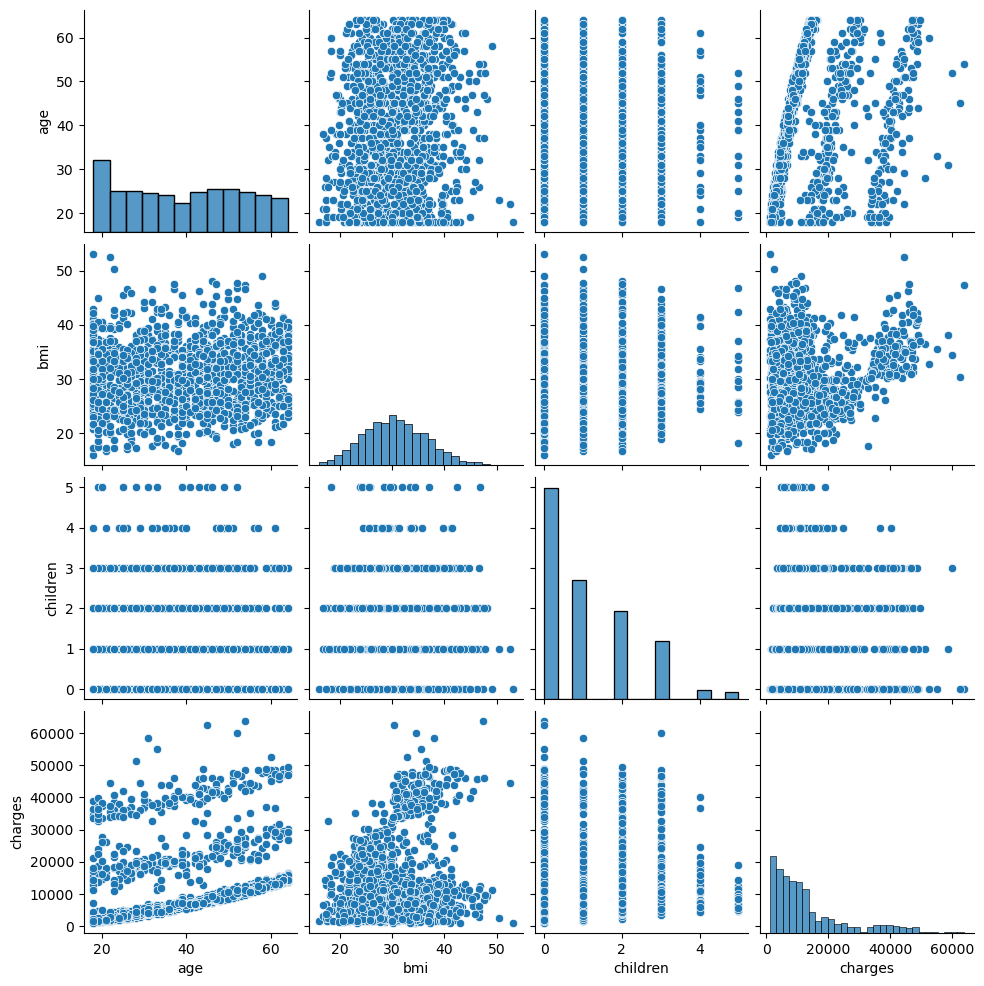

In [46]:
#sns.relplot(data=df, x=col, y='quality', kind="line")
sns.pairplot(data=df)
# plt.xlabel('alchohol', fontsize=22)
# plt.ylabel('fixed acidity',fontsize=22)
#         plt.yticks(rotation=0,fontsize=10)
# plt.tight_layout()

Checking outliers with box plot


In [50]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [51]:
num_cols

['age', 'bmi', 'children', 'charges']

age
bmi
children
charges


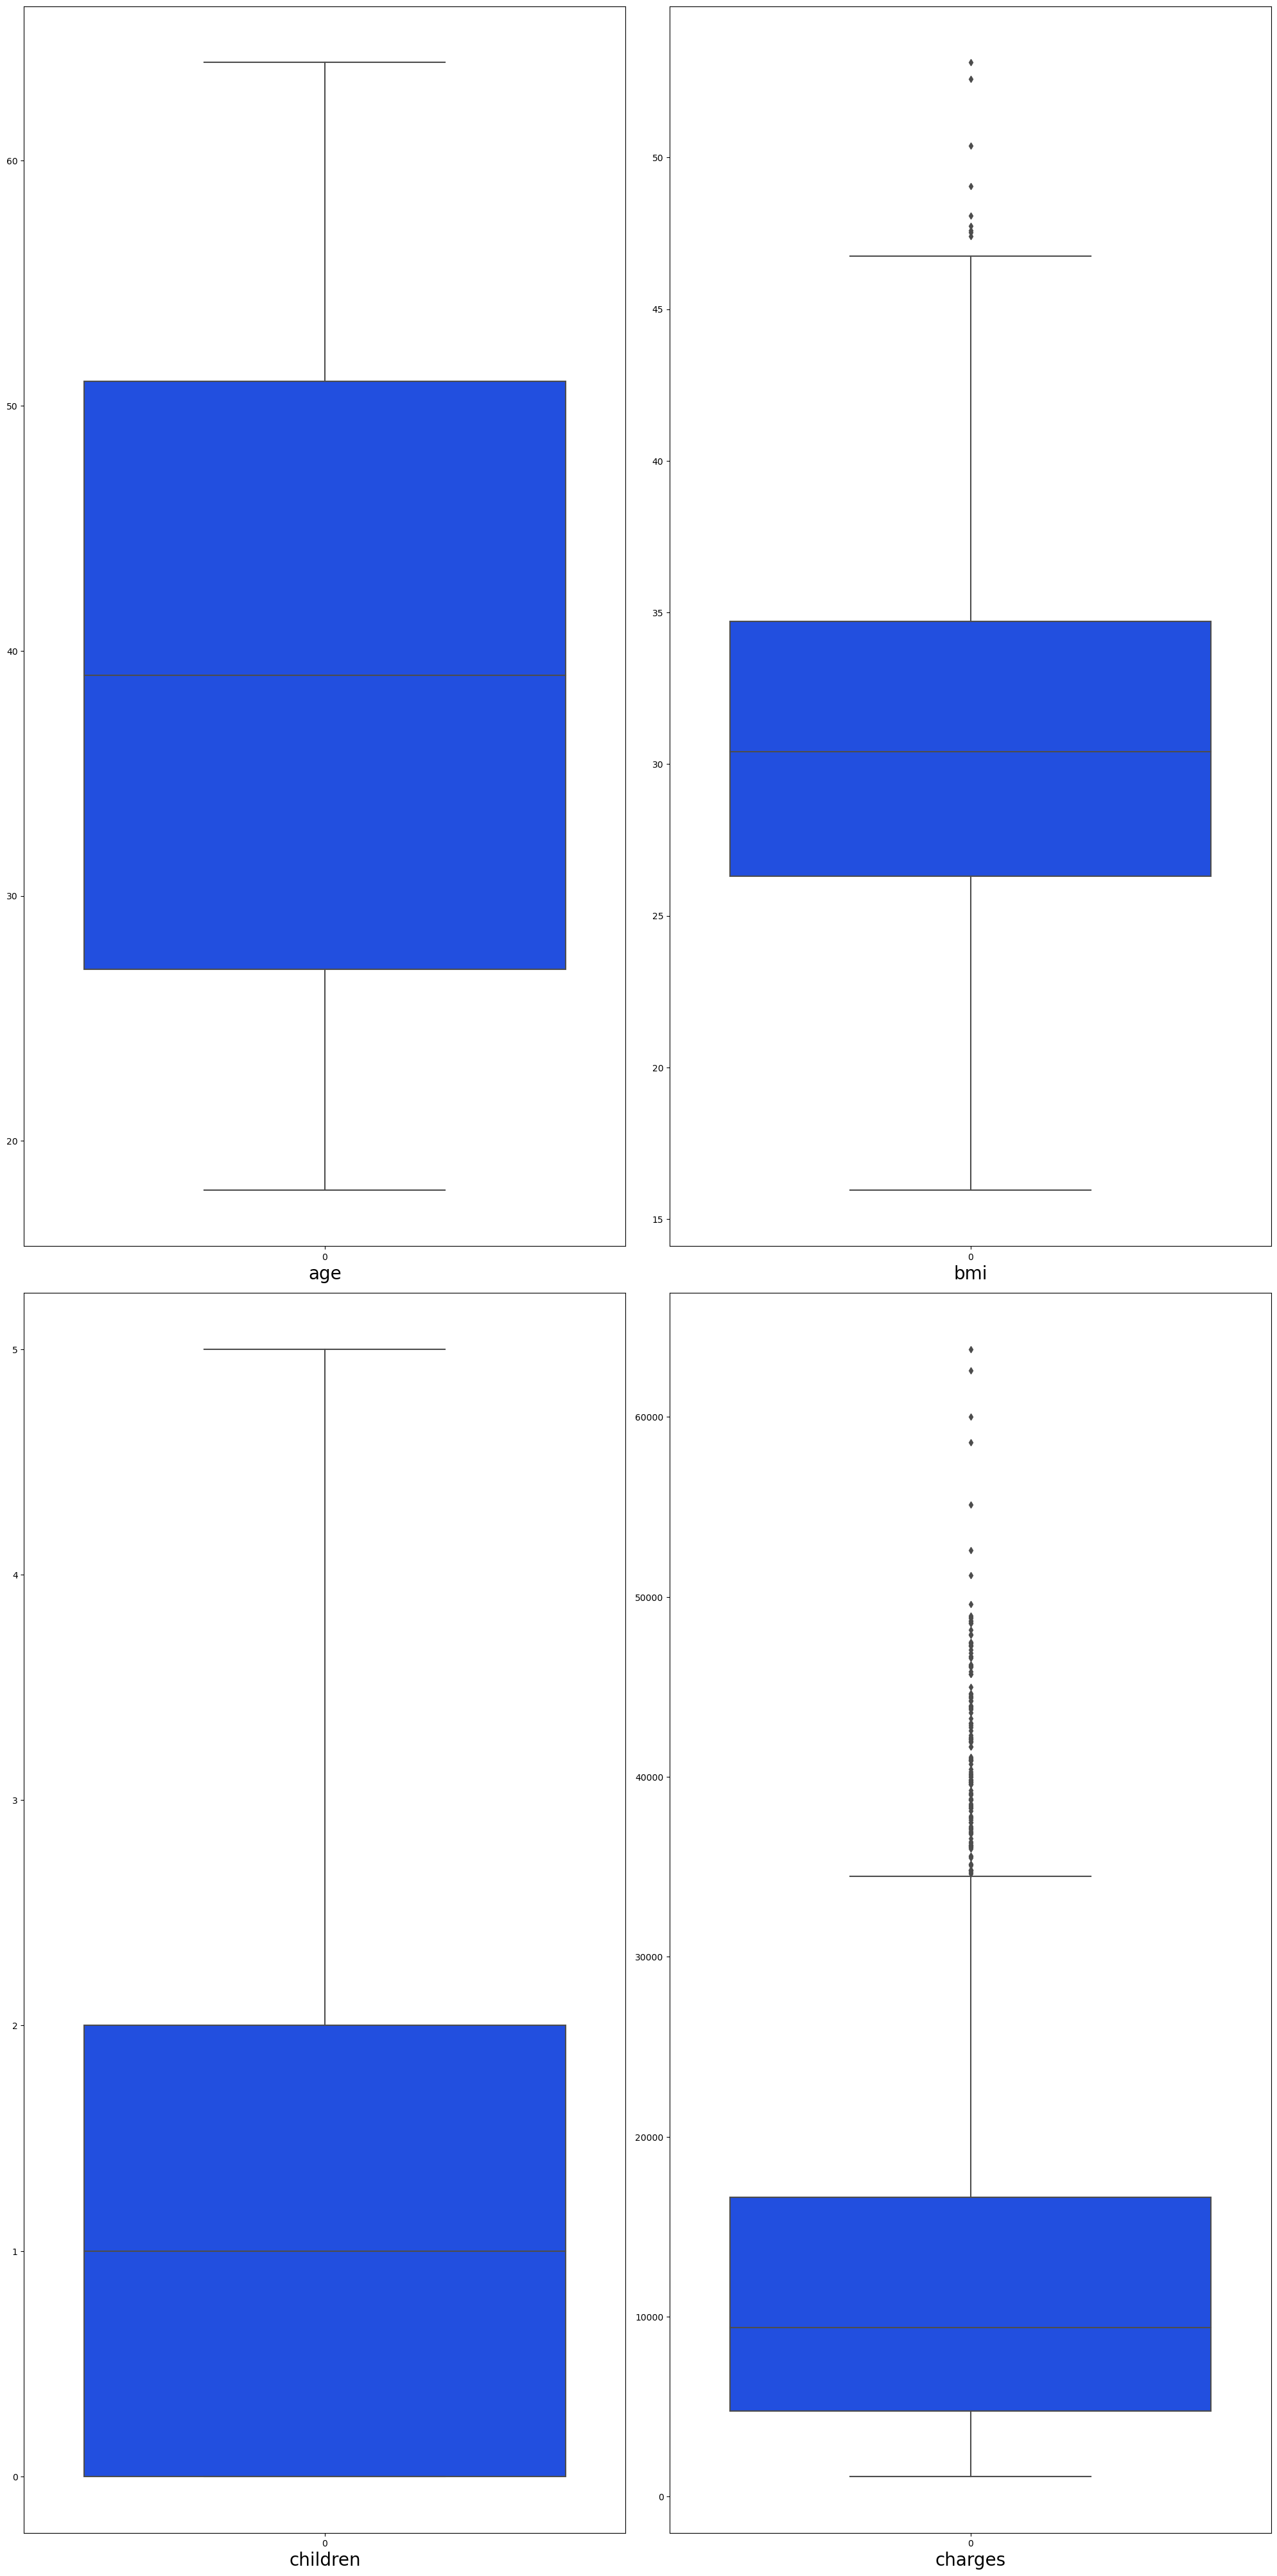

In [52]:
plt.figure(figsize=(20,200), facecolor='white')
plotnum = 1
for col in num_cols:
    print(col)
    if plotnum < 4 or df[col].dtype != 'object':
        ax = plt.subplot(10,2,plotnum)
        sns.boxplot(df[col],palette='bright')
        plt.xlabel(col,fontsize=20)
        plt.yticks(rotation=0,fontsize=10)
    plotnum +=1
plt.tight_layout()

A lot of data from most columns seems to be outliers. Need to handle those outliers

In [57]:
from sklearn.preprocessing import OneHotEncoder

one = OneHotEncoder()

In [59]:
#bad
enc = pd.get_dummies(df,columns=[col for col in df.columns if col not in num_cols])
enc

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [61]:
cat_cols = [col for col in df.columns if col not in num_cols]

In [73]:
transformed_data = one.fit_transform(df[cat_cols])
encoded_df = one.transform(df[cat_cols])


In [ ]:
one.get_feature_names_out

In [79]:
encoded_data = pd.DataFrame(transformed_data.toarray(), columns=one.get_feature_names_out(cat_cols), index=df.index)

# Concatenate the original data and the encoded data
concatenated_data = pd.concat([df, encoded_data], axis=1)

print(concatenated_data)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0            1.0       0.0        0.0         1.0               0.0   
1            0.0 

In [110]:
from sklearn.preprocessing import OrdinalEncoder

ordi = OrdinalEncoder()
for col in cat_cols:
    df[col] = ordi.fit_transform(df[col].values.reshape(-1,1))
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [84]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [86]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


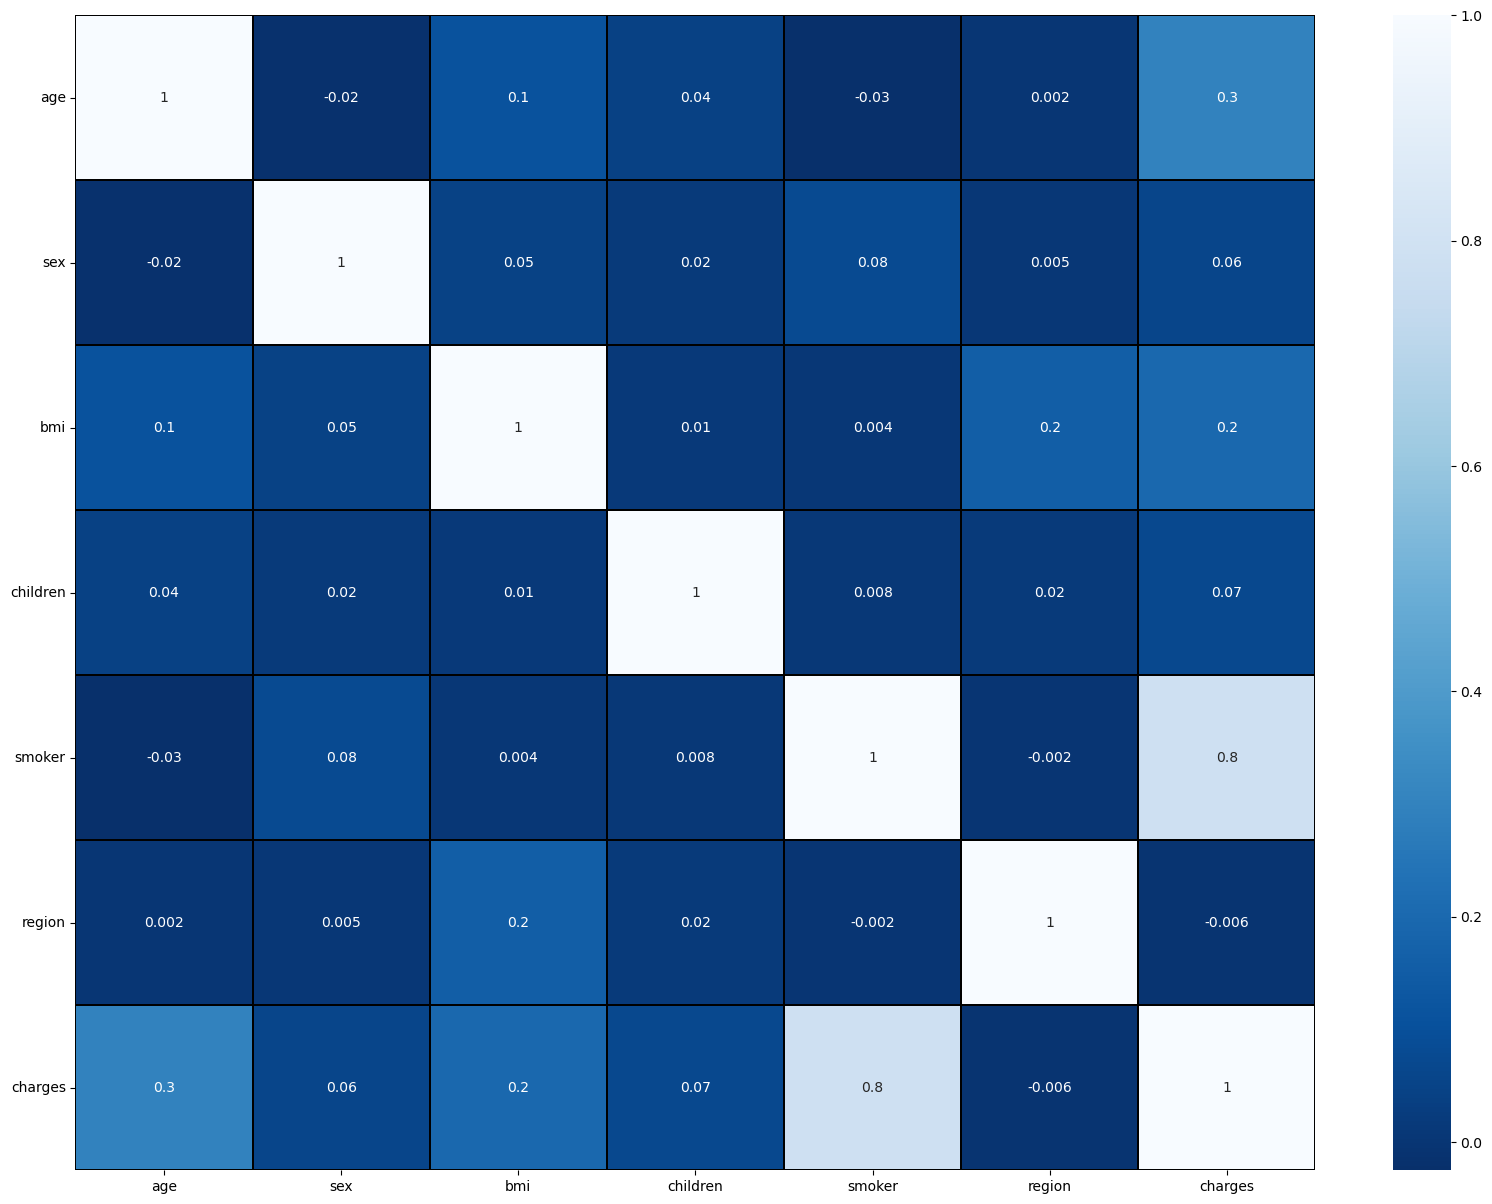

In [88]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='Blues_r',linewidths=0.1,fmt='.1g',linecolor='black',annot=True)
plt.yticks(rotation=0)
plt.show()

Text(0, 0.5, 'charges')

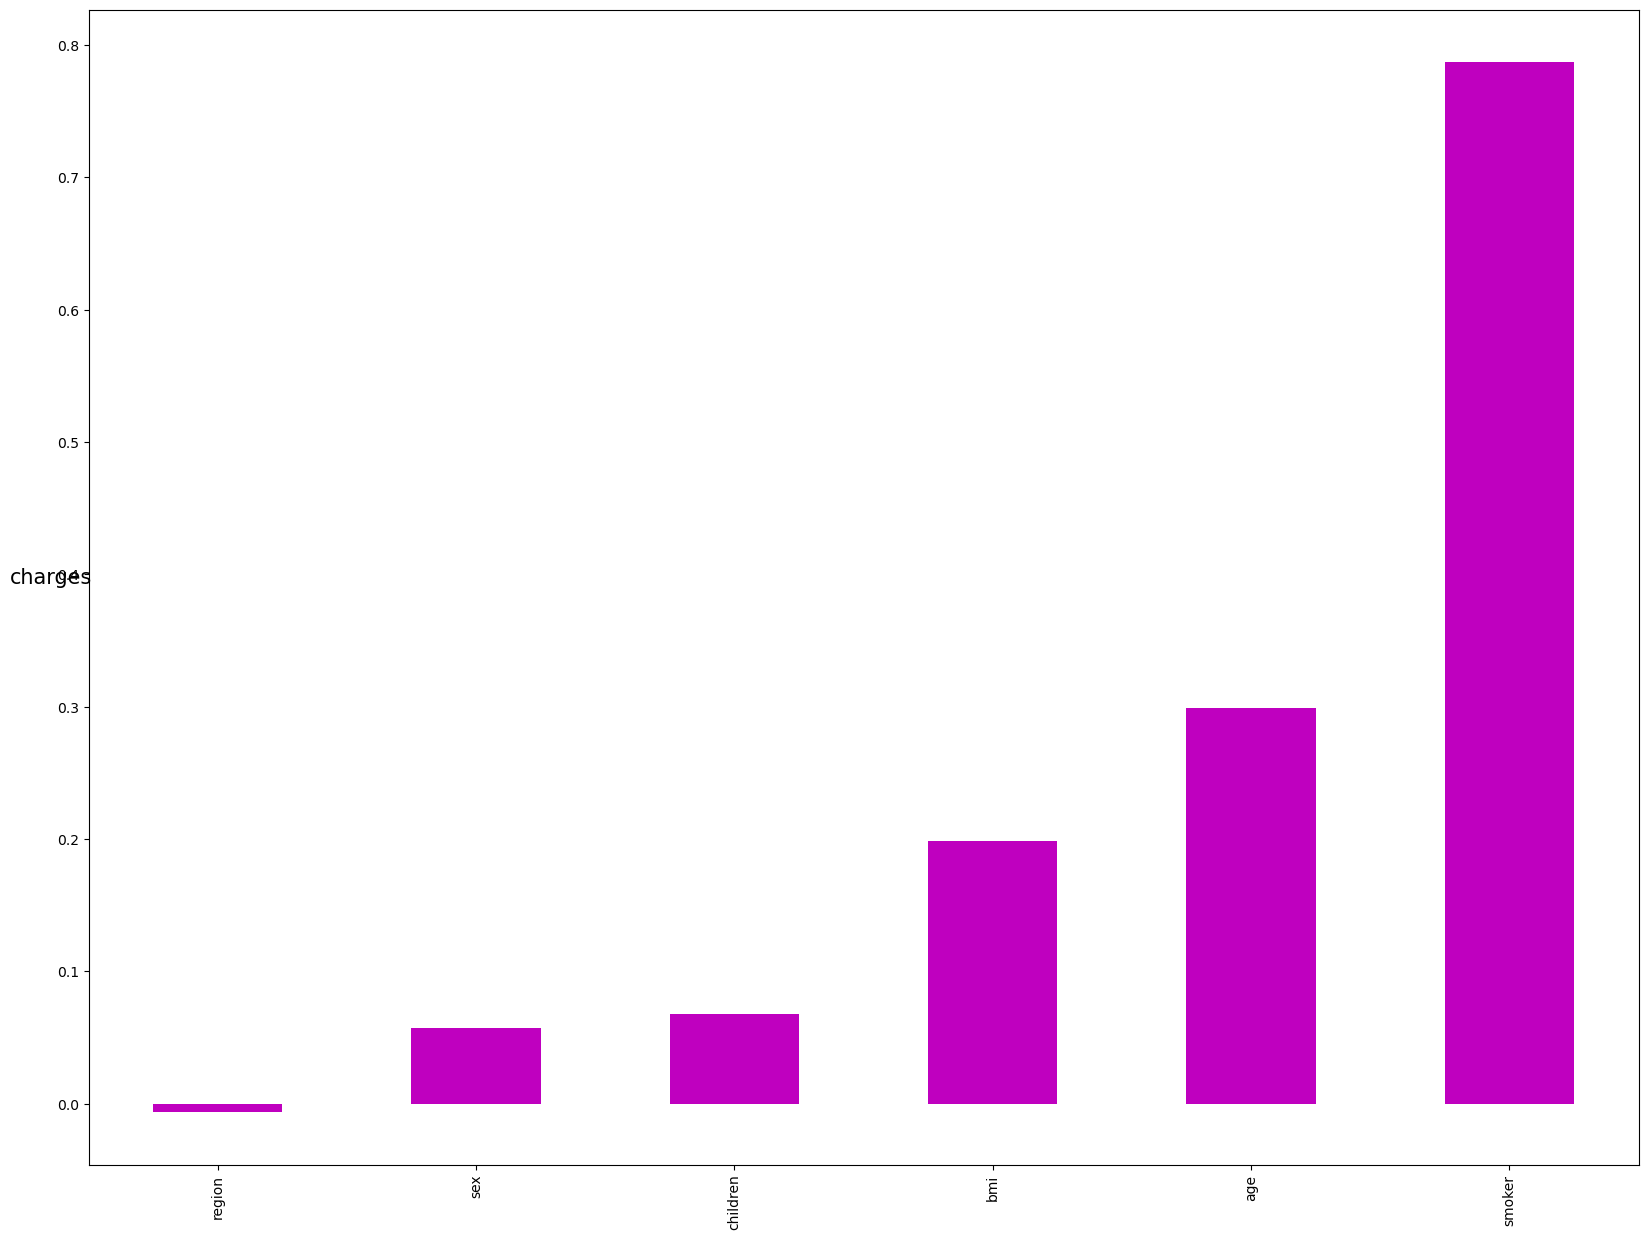

In [89]:
plt.figure(figsize=(20,15))
df.corr()['charges'].sort_values(ascending=True).drop('charges').plot(kind='bar',color='m')
plt.ylabel('charges',rotation=0,fontsize=15)

It shows a clear correlation between charges with all other variables. We can simply define by naked eye

In [111]:
x = df.drop('charges',axis=1)
y = df['charges']

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [116]:
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905


we have standardised the data to avoid bias. Now we need to check for multicollenearity

# Checking variance inflation factor (VIF)

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))] 
vif['features'] = x.columns

vif

,values,features
0,1.015394,age
1,1.008889,sex
2,1.040608,bmi
3,1.002482,children
4,1.006466,smoker
5,1.025966,region


There are no much extreme values.

Now we can see that there is not much collenearity in data

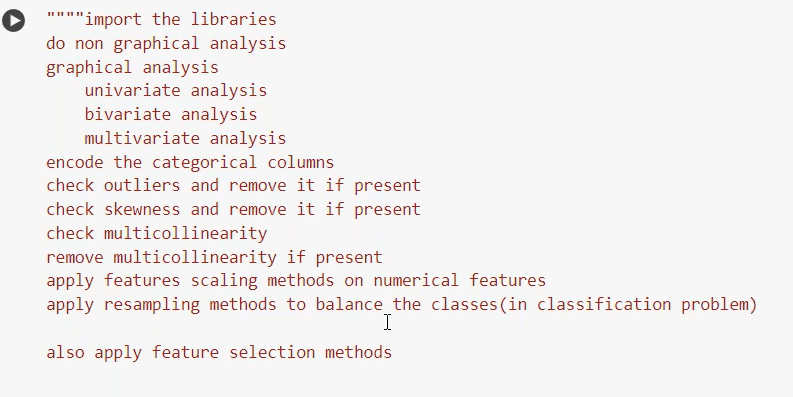

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [126]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [128]:
regessor = LinearRegression()
regessor.fit(X_train,y_train)b

LinearRegression()

In [134]:
y_test

985      7624.63000
627     11326.71487
1300    62592.87309
1121     8347.16430
450      7512.26700
           ...     
181      1631.82120
221     10564.88450
1157    14426.07385
673      6185.32080
338     41919.09700
Name: charges, Length: 402, dtype: float64

In [129]:
y_pred = regessor.predict(X_test)
y_pred

array([ 7.21796746e+03,  1.04827542e+04,  3.25831809e+04,  1.28448574e+04,
        8.52502512e+03,  3.65519797e+04, -6.03119077e+01,  1.09178825e+04,
        2.69157786e+04,  6.82952213e+03,  1.37097019e+04,  1.04558746e+04,
        4.75676383e+03, -1.06818369e+02,  3.21588256e+04,  2.75290184e+04,
        2.99891283e+03,  3.24193784e+04,  2.83477431e+04,  4.44969874e+03,
        9.54915943e+03,  3.75137621e+03,  1.33176343e+04,  3.52499725e+04,
        6.09523735e+03,  1.17520025e+04,  3.42218405e+04,  1.16641833e+04,
        8.73432232e+03,  8.28608386e+03,  1.86872429e+03, -1.53204482e+03,
        7.02981466e+03,  4.05985098e+03,  5.32027429e+03,  8.94053799e+03,
        9.01631999e+03,  6.30572785e+03,  5.69412667e+03,  5.22682256e+03,
        1.50816875e+04,  2.75187098e+03,  8.24825561e+03,  3.87473630e+03,
        3.88620673e+04,  1.46919940e+03,  3.68420299e+04,  1.53365894e+04,
        3.49878513e+03,  3.38949460e+04,  5.73619327e+03,  6.70879828e+03,
        3.32989372e+04,  

In [130]:
regessor.coef_

array([3615.37879779, -123.77624729, 2119.03629471,  610.8674051 ,
       9573.85050495, -610.41821316])

In [131]:
regessor.intercept_

13276.51678183978

In [135]:
mean_squared_error(y_test,y_pred)

34274868.99620778

In [136]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7735280171537234

We got a pretty good r2 score